In [2]:
import os
os.chdir("/Users/ryoheinamiki515/NLP-text-content-clustering")

%load_ext autoreload
%autoreload 2
%aimport src

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [3]:
from src.data import make_dataset
import numpy as np

In [4]:
articles = [
    "Machine Learning", "Computer Science", "Statistics", "Mathematics",
    "Blue", "Red", "Green", "Purple",
    "Google", "Amazon (company)", "Facebook", "Microsoft",
    "Korea", "Japan", "Mexico", "United States",
    "Barack Obama", "Donald Trump", "Bill Clinton", "Hillary Clinton",
    "Tennis", "Football", "American Football", "Basketball", "Baseball"
]

In [5]:
import wikipedia

In [12]:
data = []
for wiki in wikipedia.random(10):
    try:
        data.append(len(wikipedia.page(wiki).content))
    except:
        continue

/Users/ryoheinamiki515/opt/anaconda3/lib/python3.7/site-packages/bs4/__init__.py:181: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 193 of the file /Users/ryoheinamiki515/opt/anaconda3/lib/python3.7/runpy.py. To get rid of this warning, change code that looks like this:

 BeautifulSoup(YOUR_MARKUP})

to this:

 BeautifulSoup(YOUR_MARKUP, "lxml")

  markup_type=markup_type))


In [13]:
import matplotlib.pyplot as plt

(array([3., 2., 0., 0., 2., 0., 0., 0., 1., 1.]),
 array([ 213. ,  582.5,  952. , 1321.5, 1691. , 2060.5, 2430. , 2799.5,
        3169. , 3538.5, 3908. ]),
 <a list of 10 Patch objects>)

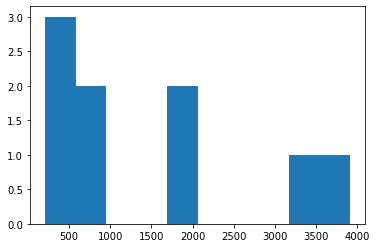

In [14]:
plt.hist(data)

In [12]:
text_data, labels = make_dataset.from_wiki(articles, summary=False)

['Machine Learning', 'Computer Science', 'Statistics', 'Mathematics', 'Blue', 'Red', 'Green', 'Purple', 'Google', 'Amazon (company)', 'Facebook', 'Microsoft', 'Korea', 'Japan', 'Mexico', 'United States', 'Barack Obama', 'Donald Trump', 'Bill Clinton', 'Hillary Clinton', 'Tennis', 'Football', 'American Football', 'Basketball', 'Baseball']


In [13]:
clean_data, changed_to_original = make_dataset.clean_data(text_data)

In [14]:
from src.models import train_model

In [15]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.cluster import KMeans

In [16]:
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(clean_data)

In [17]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
X_embedded = TSNE(n_components=2, perplexity=8, n_iter=5000).fit_transform(X)

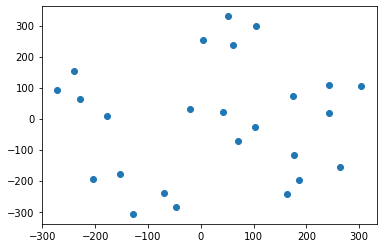

In [18]:
plt.scatter(X_embedded[:, 0], X_embedded[:, 1])

In [20]:
kmeans = KMeans(n_clusters=6)

kmeans.fit(X)

In [21]:
centers_ordered = kmeans.cluster_centers_.argsort()[:, ::-1] 
for i in range(kmeans.n_clusters):
    indices = np.where(kmeans.labels_ == i)[0]
    cluster_labels = [labels[i] for i in indices]
    print(f"Cluster #{i}:", ", ".join(cluster_labels))
    prominent_words = changed_to_original.loc[np.array(vectorizer.get_feature_names())[centers_ordered[i][:5]]].unique()
    print("Prominent words:", ", ".join(prominent_words))
    print("==============================\n")

Cluster #0: Mathematics, Machine_Learning, Statistics, Computer_Science
Prominent words: mathematics, mathematical, mathematic, mathematically, computation, computer, computations, computability, computational, computers, computing, compute, computes, computationally, computed, computics, computable, statistics, statistical, statistically, statistic, learning, learn, learned, learns, data

Cluster #1: Tennis, American_Football, Football, Basketball, Baseball
Prominent words: ball, balls, balles, players, player, football, footballers, footballs, basketball, play, playing, plays, played, playfulness, playes, playe

Cluster #2: Donald_Trump, Barack_Obama, Bill_Clinton, Hillary_Clinton
Prominent words: clinton, clintons, obama, obamas, trump, trumped, president, presidency, presidents, presided, presiding, preside, elected, election, elections, elective, elect, electing

Cluster #3: Mexico, Japan, United_States, Korea
Prominent words: japan, japanization, mexico, state, states, stated, st

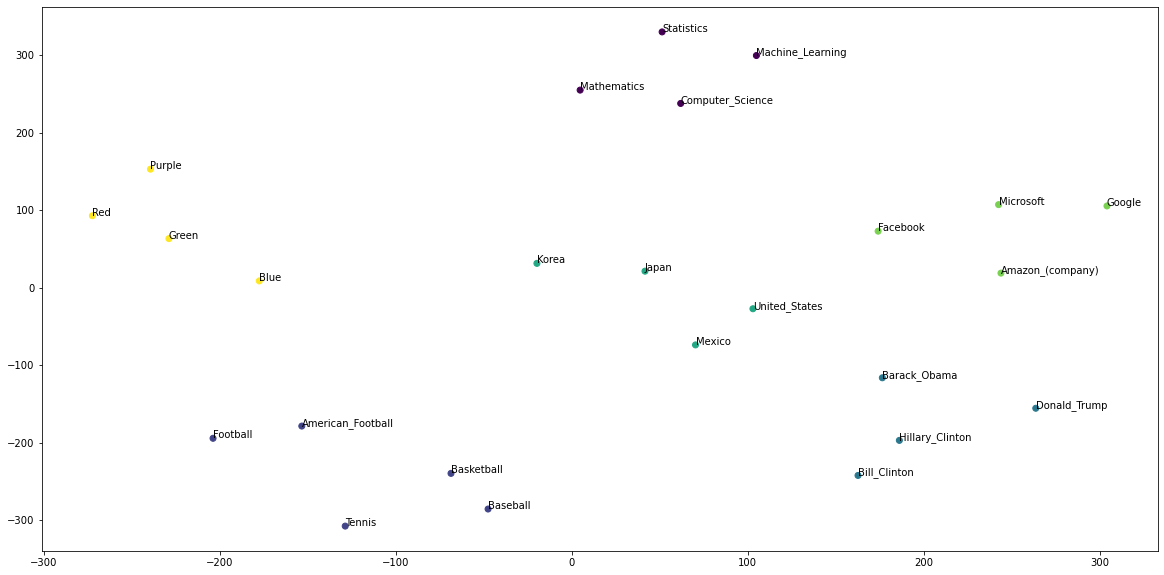

In [22]:
fig, ax = plt.subplots(figsize=(20, 10))
ax.scatter(X_embedded[:, 0], X_embedded[:, 1], c=kmeans.labels_, cmap='viridis')
for i, txt in enumerate(labels):
    ax.annotate(txt, (X_embedded[:, 0][i], X_embedded[:, 1][i]))

In [30]:
fig.savefig("./reports/cluster_plot.png")